In [12]:
%matplotlib inline 

import os
import glob
import numpy as np
import pandas as pd
# from skimage import io 
import rasterio
import fiona
import rasterio.mask
from rasterio.plot import show_hist
# import subprocess as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import datetime

import fiona
import rasterio
import rasterio.mask


In [13]:
path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd'

shp = '/home/meganmason/Documents/projects/thesis/maps/map_layers/tuolumne_delineation/corrected_tuolumne_subbasin.shp'

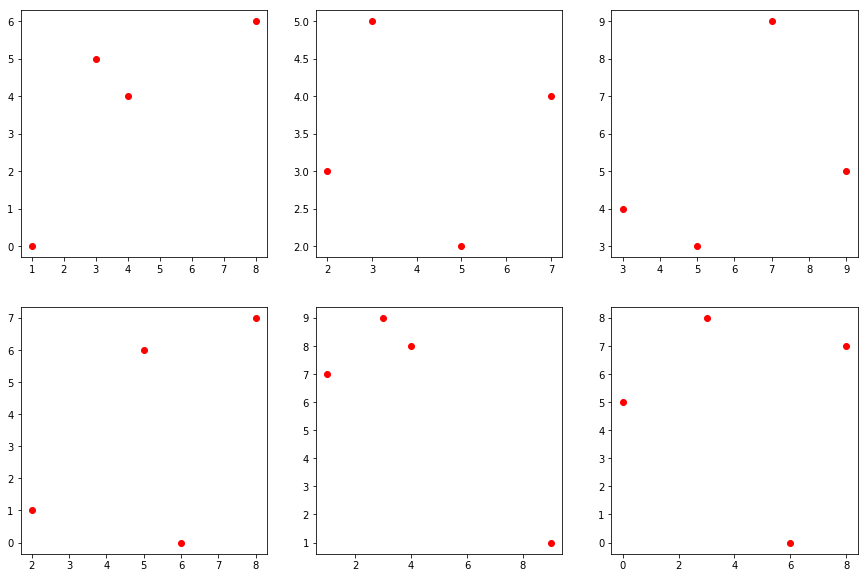

In [48]:
#SUBPLOT TEST ~~~~~
import random

i=1
plt.figure(figsize = (15, 10))

for n in range(6):

    x=random.sample(range(10), 4)
    y=random.sample(range(10), 4)

    ax=plt.subplot(2,3,i)
    plt.plot(x,y,'ro')
    
    i +=1

(1, 16782, 17569)


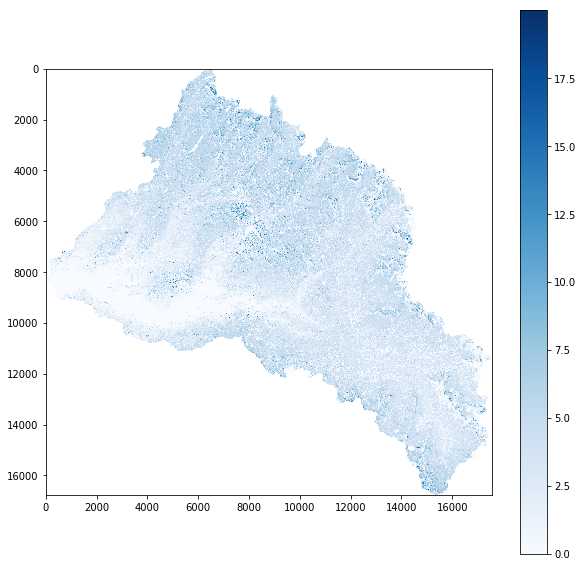

In [40]:
#WORKS FOR ONE
path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/TE20170303_SUPERsnow_depth_3p0m.tif'

import fiona
import rasterio
import rasterio.mask

plt.figure(figsize = (10, 10))

with fiona.open(shp, "r") as shapefile:
    geoms = [feature["geometry"] for feature in shapefile]

with rasterio.open(path) as src:
    out_image, out_transform = rasterio.mask.mask(src, geoms, crop=True, nodata=np.nan)
    out_meta = src.meta.copy()

out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open("test_mask.tif", "w", **out_meta) as dest:
    dest.write(out_image)

    
    ax=plt.subplot(2,3,i)
    
    
    print(out_image.shape)
    plt.imshow(out_image[0,:,:], cmap='Blues')
    plt.colorbar()
    plt.show()

In [45]:
#list of files
path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/'

flist = glob.glob(path + '/*.tif')
for i,f in enumerate(sorted(flist)):
    print(i,f)    

0 /home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/TB20130403_SUPERsnow_depth_3p0m.tif
1 /home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/TB20140407_SUPERsnow_depth_3p0m.tif
2 /home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/TB20150415_SUPERsnow_depth_3p0m.tif
3 /home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/TE20160401_SUPERsnow_depth.tif
4 /home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/TE20170303_SUPERsnow_depth_3p0m.tif
5 /home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/TE20180423_SUPERsnow_depth_3p0m.tif


/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/TB20130403_SUPERsnow_depth_3p0m.tif
(1, 16780, 17489)


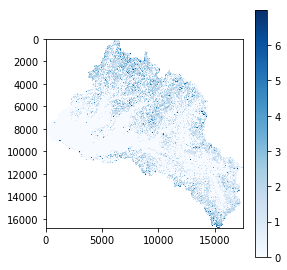

/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/TB20140407_SUPERsnow_depth_3p0m.tif
(1, 16780, 17489)


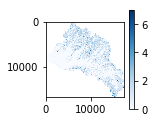

/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/TB20150415_SUPERsnow_depth_3p0m.tif
(1, 16780, 17489)


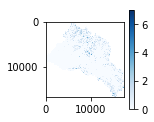

/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/TE20160401_SUPERsnow_depth.tif
(1, 16782, 17569)


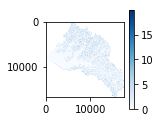

/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/TE20170303_SUPERsnow_depth_3p0m.tif
(1, 16782, 17569)


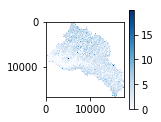

/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/TE20180423_SUPERsnow_depth_3p0m.tif
(1, 16782, 17569)


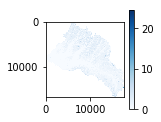

In [47]:

plt.figure(figsize = (15, 10))
k=1


for i,f in enumerate(sorted(flist)):
    print(f)
    with fiona.open(shp, "r") as shapefile:
        geoms = [feature["geometry"] for feature in shapefile]

    with rasterio.open(f) as src:
        out_image, out_transform = rasterio.mask.mask(src, geoms, crop=True, nodata=np.nan)
        out_meta = src.meta.copy()

    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})

    with rasterio.open("test_mask.tif", "w", **out_meta) as dest:
        dest.write(out_image)

        print(out_image.shape)
        
        ax=plt.subplot(2,3,k)
        
        
        plt.imshow(out_image[0,:,:], cmap='Blues')
        plt.colorbar()
        plt.show()
        
        k +=1